In [2]:
import regions_code.tools as tools
import tensorflow as tf
import numpy as np

In [63]:

X_train = np.random.random((100, 2))
Y_train = np.random.randint(0, 10, (100,))
X_test = np.random.random((100, 2))
Y_test = np.random.randint(0, 10, (100,))

network = [8, 4, 4]

input_placeholder = tf.placeholder(tf.float32, (None, 2))
output_placeholder = tf.placeholder(tf.int64, (None,))

tf.reset_default_graph()
input_placeholder = tf.placeholder(tf.float32, (None, X_train.shape[1]))
output_placeholder = tf.placeholder(tf.int64, (None,))
preacts = []
relu = input_placeholder
for width in network:
    dense_layer = tf.layers.dense(relu, width, activation=None, use_bias=True)#,
                                  #kernel_initializer=weight_initializer,
                                  #bias_initializer=bias_initializer(BIAS_STD))
    preacts.append(dense_layer)
    relu = tf.nn.relu(dense_layer)
output_layer = tf.layers.dense(relu, 10, activation=None, use_bias=True)#, kernel_initializer=weight_initializer,
                               #bias_initializer=bias_initializer(BIAS_STD))
#loss = tf.losses.sparse_softmax_cross_entropy(output_placeholder, output_layer)
#correct = tf.equal(output_placeholder, tf.argmax(tf.nn.softmax(output_layer), axis=-1))
#acc = 100 * tf.reduce_mean(tf.cast(correct, tf.float32))
#train_op = tf.train.AdamOptimizer(LR).minimize(loss)
relu_states = [tf.greater(preact, tf.zeros_like(preact)) for preact in preacts]
weights = [w for w in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES) if w.name.endswith('kernel:0')]
biases = [b for b in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES) if b.name.endswith('bias:0')]

fn_weight, fn_bias, _, _ = tools.get_sample_plane2(X_train, Y_train)
#fn_weight = np.array([[-1, 1], [1, 1]])
#fn_bias = np.array([0,0])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    [the_weights, the_biases] = sess.run([weights, biases],
                                         feed_dict={input_placeholder: X_test, output_placeholder: Y_test})
    regions = tools.count_regions_2d_2(the_weights[:-1], the_biases[:-1], the_weights[-1], the_biases[-1],
                            fn_weight, fn_bias, return_regions=True)

In [64]:
fn_weight

array([[ 0.14597818,  0.97069731,  0.07090913],
       [ 0.96973766, -0.15117498,  0.07311626]])

In [65]:
the_weights[0]

array([[-0.06720781,  0.41852266,  0.2967103 , -0.1021018 ,  0.1349001 ,
        -0.04352015, -0.0028277 , -0.46576592],
       [ 0.42745048,  0.7124415 ,  0.5401823 , -0.32639456,  0.51899487,
         0.38758403,  0.52238685,  0.2118091 ],
       [-0.0401665 ,  0.33670527, -0.00089818, -0.62351024, -0.01536155,
        -0.04409158, -0.6974813 , -0.38483623]], dtype=float32)

In [3]:
import matplotlib.pyplot as pp
import matplotlib.cm as cm
fn_weight = np.array(([-1,1], [1,1]))
fn_bias = np.array([0,0])
sizes = [2, 4, 4, 4, 4]

last_regions = []
last_centroids = None

rng2 = np.random.default_rng(43)

export = []

N = 120
space = np.linspace(0, 0.0009, N)

for i in range(N):

    rng = np.random.default_rng(42)
    cmap = cm.brg

    the_weights = [rng.uniform(-0.1,0.1, (a,b))
                   for a,b in zip(sizes[:-1], sizes[1:])]
    the_biases = [rng.uniform(-0.01,0.01, (a,))
                   for a in sizes[1:]]
    #print(the_biases[-2][1])
    the_biases[-2][1] -= space[i]#i * 0.0001

    regions = tools.count_regions_2d_2(the_weights[:-1], the_biases[:-1], the_weights[-1], the_biases[-1],
                                fn_weight, fn_bias, return_regions=True)
    new_regions = []
    centroids = np.array([calculate_polygon_centroid(r.vertices)
                          for r in regions])
    if last_centroids is not None:
        dists = ((centroids[:, :, None] - last_centroids.T[None, :, :])**2).sum(1)
        closest = dists.argmin(1)
        colors = last_colors[closest]
        bc = np.bincount(closest)
        nz = np.nonzero(bc > 1)[0]
        for n in nz:
            colors[closest==n] = np.concatenate(
                [colors[closest==n][0][None, :],
                 cmap(rng2.uniform(0,1, bc[n]-1))])
    else:
        colors = cmap(rng2.uniform(0,1, len(regions)))
    last_colors = colors
    last_centroids = centroids
    export.append([np.float32(colors).tolist(), [np.float32(r.vertices).tolist() for r in regions]])
    if i == 0 or i == N-1:
        for r, c in zip(regions, colors):
            pp.fill(*zip(*r.vertices), c=c, alpha=0.25)
        pp.scatter(centroids[:, 0], centroids[:, 1])
        pp.show()

NameError: name 'calculate_polygon_centroid' is not defined

In [170]:
import json
with open('anim_last_layer_bias.json', 'w') as f:
    f.write(json.dumps(export))
#import pickle
#pickle.dump(export, open('test.pkl', 'wb'))

-0.23483492837236963


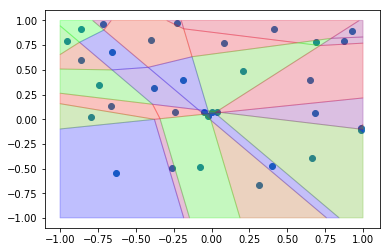

-0.24155761744799986
-0.24828030652363015
-0.2550029955992604
-0.26172568467489066
-0.2684483737505209
-0.2751710628261511
-0.2818937519017814
-0.2886164409774116
-0.2953391300530419
-0.3020618191286722
-0.3087845082043024
-0.31550719727993265
-0.32222988635556293
-0.32895257543119316
-0.33567526450682345
-0.3423979535824537
-0.3491206426580839
-0.3558433317337142
-0.36256602080934447
-0.3692887098849747
-0.3760113989606049
-0.38273408803623515
-0.38945677711186544
-0.3961794661874957
-0.40290215526312595
-0.4096248443387562
-0.41634753341438646
-0.4230702224900167
-0.429792911565647
-0.4365156006412772
-0.44323828971690743
-0.4499609787925377
-0.456683667868168
-0.4634063569437982
-0.47012904601942845
-0.47685173509505874
-0.48357442417068897
-0.49029711324631925
-0.4970198023219495
-0.5037424913975798
-0.51046518047321
-0.5171878695488402
-0.5239105586244704
-0.5306332477001007
-0.5373559367757309
-0.5440786258513611
-0.5508013149269915
-0.5575240040026217
-0.5642466930782519
-0.5709

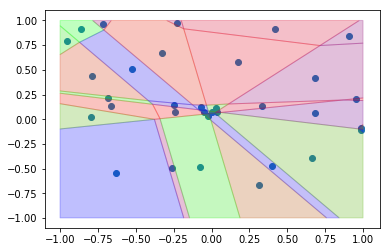

In [25]:
import matplotlib.pyplot as pp
import matplotlib.cm as cm
fn_weight = np.array(([-1,1], [1,1]))
fn_bias = np.array([0,0])
sizes = [2, 4, 4, 4, 4]

last_regions = []
last_centroids = None

rng2 = np.random.default_rng(43)

export = []

N = 120
space = np.linspace(0.2, 1, N)

for i in range(N):

    rng = np.random.default_rng(42)
    cmap = cm.brg

    the_weights = [rng.uniform(-0.1,0.1, (a,b))
                   for a,b in zip(sizes[:-1], sizes[1:])]
    the_biases = [rng.uniform(-0.01,0.01, (a,))
                   for a in sizes[1:]]
    #print(the_biases[-2][1])
    #the_biases[-2][1] -= space[i]#i * 0.0001
    the_weights[-2][2,0] -= space[i]#i * 0.0001
    print(the_weights[-2][2,0])

    regions = tools.count_regions_2d_2(the_weights[:-1], the_biases[:-1], the_weights[-1], the_biases[-1],
                                fn_weight, fn_bias, return_regions=True)
    new_regions = []
    centroids = np.array([calculate_polygon_centroid(r.vertices)
                          for r in regions])
    if last_centroids is not None:
        dists = ((centroids[:, :, None] - last_centroids.T[None, :, :])**2).sum(1)
        closest = dists.argmin(1)
        colors = last_colors[closest]
        bc = np.bincount(closest)
        nz = np.nonzero(bc > 1)[0]
        for n in nz:
            colors[closest==n] = np.concatenate(
                [colors[closest==n][0][None, :],
                 cmap(rng2.uniform(0,1, bc[n]-1))])
    else:
        colors = cmap(rng2.uniform(0,1, len(regions)))
    last_colors = colors
    last_centroids = centroids
    export.append([np.float32(colors).tolist(), [np.float32(r.vertices).tolist() for r in regions]])
    if i == 0 or i == N-1:
        for r, c in zip(regions, colors):
            pp.fill(*zip(*r.vertices), c=c, alpha=0.25)
        pp.scatter(centroids[:, 0], centroids[:, 1])
        pp.show()

In [26]:
import json
with open('anim_last_layer_weight.json', 'w') as f:
    f.write(json.dumps(export))
#import pickle
#pickle.dump(export, open('test.pkl', 'wb'))

In [4]:
# https://github.com/pwcazenave/pml-git/blob/master/python/centroids.py

def calculate_polygon_area(polygon, signed=False):
    P = np.array(polygon)
    # Extract x and y coordinates
    x = P[:, 0]
    y = P[:, 1]

    # Area calculation
    a = x[:-1] * y[1:]
    b = y[:-1] * x[1:]
    A = np.sum(a - b) / 2.

    # Return signed or unsigned area
    if signed:
        return A
    else:
        return abs(A)


def calculate_polygon_centroid(polygon):
    P = np.array(polygon)
    P = np.concatenate([P, P[:1, :]], 0)
    
    # Get area - needed to compute centroid
    A = calculate_polygon_area(P, signed=True)

    # Extract x and y coordinates
    x = P[:, 0]
    y = P[:, 1]

    # Exercise: Compute C as shown in http://paulbourke.net/geometry/polyarea
    a = x[:-1] * y[1:]
    b = y[:-1] * x[1:]

    cx = x[:-1] + x[1:]
    cy = y[:-1] + y[1:]

    Cx = np.sum(cx * (a - b)) / (6. * A)
    Cy = np.sum(cy * (a - b)) / (6. * A)

    # Create Nx2 array and return
    C = np.array([Cx, Cy])
    return C

In [122]:
z = np.int32([1,1,2,3,4,5,6,6])
nz = np.nonzero(np.bincount(z) > 1)[0]
print(nz)
for i in nz:
    z[z==i][1:] = 

[1 6]


In [28]:
import torch
a = torch.tensor([0.5, 0.1], requires_grad=True)
b = torch.tensor([0.1, 0.42], requires_grad=True)
c = torch.tensor([1.1, 2.0], requires_grad=True)

x = torch.tensor([10, 20.0])

ha = a * x
hb = b * ha
lb = hb.sum()

hb = b * ha.detach() # instead, some_magic(hb)
hc = c * hb
lc = hc.sum()

(lb + lc).backward()
print(torch.cat([i.grad for i in [a,b,c]]))

ha = a * x
hb = b * ha
lb = hb.sum()

hb = someb * ha.detach()
hc = c * hb
lc = hc.sum()

(lb + lc).backward()
print(torch.cat([i.grad for i in [a,b,c]]))

tensor([ 1.0000,  8.4000, 10.5000,  6.0000,  0.5000,  0.8400])


In [77]:
class A(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.ones(2, requires_grad=True)
        
    def test(self, mod, grad_inputs, grad_outputs):
        print('test', mod, grad_inputs, grad_outputs)
        #print(grad_outputs[0].mark)
        self.qq = grad_outputs[0]
        return None
        
    def forward(self, x):
        return x * self.w

a = A()

In [78]:
a.register_backward_hook(a.test)

In [79]:

asd = torch.tensor(1.0)
asd.mark = 32

In [87]:
b = torch.tensor([0.1, 0.42], requires_grad=True)
a(b).sum().pow(2).backward(asd, create_graph=True)

test A() (tensor([1.0400, 1.0400], grad_fn=<MulBackward0>), tensor([0.1040, 0.4368], grad_fn=<MulBackward0>)) (tensor([1.0400, 1.0400], grad_fn=<ExpandBackward>),)


In [81]:
b.grad

tensor([1., 1.])

In [96]:
l = torch.nn.Sequential(torch.nn.Linear(32, 12), torch.nn.Linear(12, 16))

In [98]:
l[1]

Linear(in_features=12, out_features=16, bias=True)